<a href="https://colab.research.google.com/github/Blvisse/EDA/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from  scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files.upload()

Saving adult.csv to adult.csv


{'adult.csv': b'"age","workclass","fnlwgt","education","education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"\n90,"?",77053,"HS-grad",9,"Widowed","?","Not-in-family","White","Female",0,4356,40,"United-States","<=50K"\n82,"Private",132870,"HS-grad",9,"Widowed","Exec-managerial","Not-in-family","White","Female",0,4356,18,"United-States","<=50K"\n66,"?",186061,"Some-college",10,"Widowed","?","Unmarried","Black","Female",0,4356,40,"United-States","<=50K"\n54,"Private",140359,"7th-8th",4,"Divorced","Machine-op-inspct","Unmarried","White","Female",0,3900,40,"United-States","<=50K"\n41,"Private",264663,"Some-college",10,"Separated","Prof-specialty","Own-child","White","Female",0,3900,40,"United-States","<=50K"\n34,"Private",216864,"HS-grad",9,"Divorced","Other-service","Unmarried","White","Female",0,3770,45,"United-States","<=50K"\n38,"Private",150601,"10th",6,"Separated","Adm-clerical","Unmarried","Wh

# EDA 

In [3]:
#read the data 
data=pd.read_csv('adult.csv')

In [4]:
#lets have a look at the data 
data.head()

age workclass  fnlwgt  ... hours.per.week  native.country income
0   90         ?   77053  ...             40   United-States  <=50K
1   82   Private  132870  ...             18   United-States  <=50K
2   66         ?  186061  ...             40   United-States  <=50K
3   54   Private  140359  ...             40   United-States  <=50K
4   41   Private  264663  ...             40   United-States  <=50K

[5 rows x 15 columns]

In [5]:
#lets get all the columns of the data
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#lets get a better undestanding of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

age        fnlwgt  ...  capital.loss  hours.per.week
count  32561.000000  3.256100e+04  ...  32561.000000    32561.000000
mean      38.581647  1.897784e+05  ...     87.303830       40.437456
std       13.640433  1.055500e+05  ...    402.960219       12.347429
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.178270e+05  ...      0.000000       40.000000
50%       37.000000  1.783560e+05  ...      0.000000       40.000000
75%       48.000000  2.370510e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [8]:
#lets check for the number of null values per column/feature
data.isna().sum().sort_values(ascending=False)

income            0
native.country    0
hours.per.week    0
capital.loss      0
capital.gain      0
sex               0
race              0
relationship      0
occupation        0
marital.status    0
education.num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64

# Univariate Analysis

In [9]:
#we begin with univariate analysis on the whole data
data.head()

age workclass  fnlwgt  ... hours.per.week  native.country income
0   90         ?   77053  ...             40   United-States  <=50K
1   82   Private  132870  ...             18   United-States  <=50K
2   66         ?  186061  ...             40   United-States  <=50K
3   54   Private  140359  ...             40   United-States  <=50K
4   41   Private  264663  ...             40   United-States  <=50K

[5 rows x 15 columns]

Some key highlights that we get from this:

1. We epect the columns age,fnlwgt,education.num, capital.gain, cappital.loss,hours.per.week to be numerical columns(datatypes)
2. Workclass,education,marital.status,occupation,relationship,race,sex and income to be categorical columns(datatypes)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
#clear up the columns so that to make them easy to read
data.columns=data.columns.str.replace(".","_")

In [12]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

## Univariate on Numerical columns

#### Age

In [13]:
#We carry out descriptie statistics on the column to find the mean,mode,SD,median,kurtosis and skewness
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

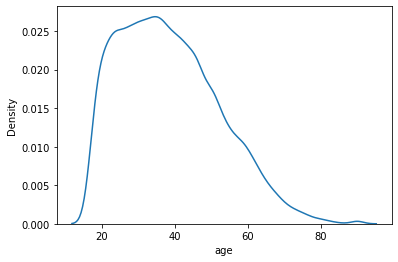

In [14]:
sns.kdeplot(data['age'])

In [16]:

stats.kurtosis(data['age'])

-0.1662862143440753

The specific column has a platykurtic / negative kurtosis


In [47]:
stats.skew(data['age'])

0.5587176292398569

This specific column is approximately symmetric

In [48]:
data.age.mode()

0    36
dtype: int64

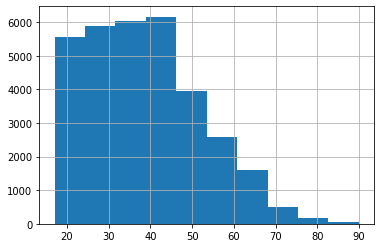

In [49]:
data['age'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


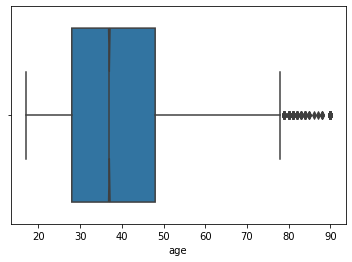

In [50]:
sns.boxplot(data['age'],notch=True)

### fnlwgt

In [51]:
data['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


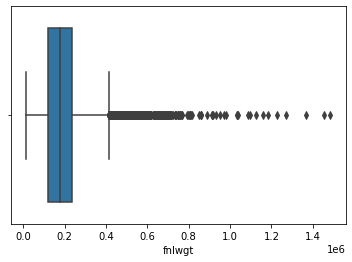

In [52]:
sns.boxplot(data['fnlwgt'])

We can see it has tons of outliers 

In [53]:
stats.kurtosis(data['fnlwgt'])

6.217671807559245

This is a positive kurtosis(leptokurtic) and it signifies a heavy tail on both sides which translates to a huge number of outliers as seen in the boxplot above

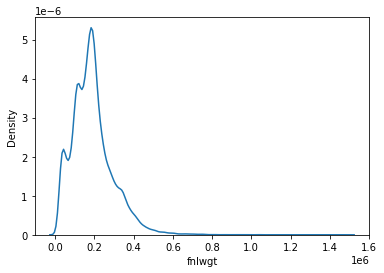

In [54]:
sns.kdeplot(data['fnlwgt'])

In [55]:
stats.skew(data['fnlwgt'])

1.4469134351423292

The skewness value is positive, which is reflective on the kde plot above with an elongated tail to to the right 

### education_num

In [56]:
data['education_num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education_num, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


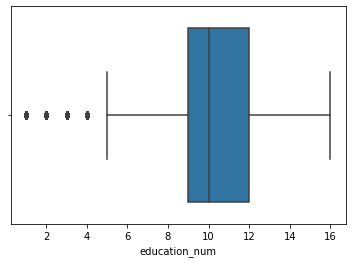

In [57]:
sns.boxplot(data['education_num'])

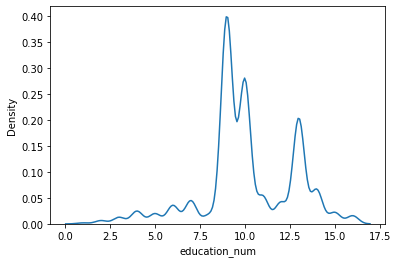

In [58]:
sns.kdeplot(data['education_num'])

In [59]:
stats.kurtosis(data['education_num'])

0.623164080227002

This potrays a positive kurtosis hence long tails and hence huge number of outliers

In [60]:
stats.skew(data['education_num'])

-0.3116615096354675

This stats is supported by the longtail on the left handside of the kde plot signifying a negative skweness

### Capital_Gain

In [61]:
data['capital_gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


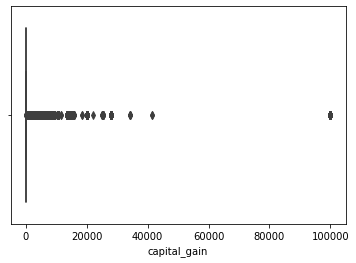

In [62]:
sns.boxplot(data['capital_gain'])

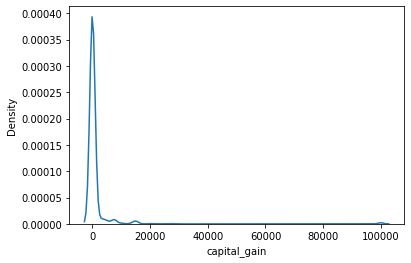

In [63]:
sns.kdeplot(data['capital_gain'])

In [64]:
stats.kurtosis(data['capital_gain'])

154.77548393002547

In [65]:
stats.skew(data['capital_gain'])

11.953296998194327

### Capital_Loss

In [66]:
data['capital_loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


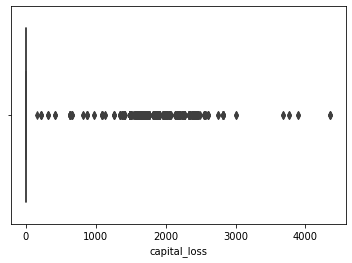

In [67]:
sns.boxplot(data['capital_loss'])

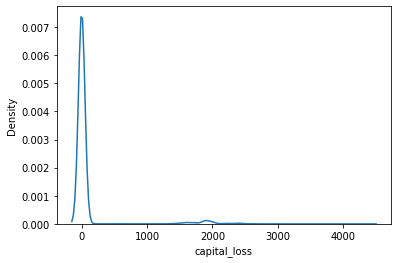

In [68]:
sns.kdeplot(data['capital_loss'])

In [69]:
stats.kurtosis(data['capital_loss'])

20.373488564437316

In [70]:
stats.skew(data['capital_loss'])

4.594417456439774

### Hours_per_week

In [71]:
data['hours_per_week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


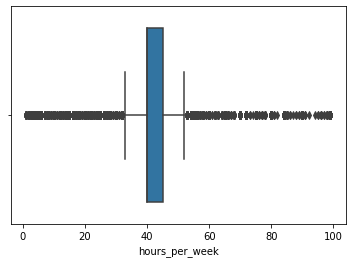

In [72]:
sns.boxplot(data['hours_per_week'])

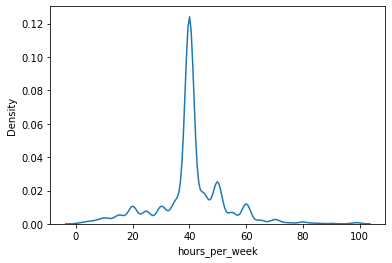

In [73]:
sns.kdeplot(data['hours_per_week'])

In [74]:
stats.kurtosis(data['hours_per_week'])

2.91605467098449

In [75]:
stats.skew(data['hours_per_week'])

0.22763204977477705

## Univariate Analyis on Categorical Columns

### Workclass

In [77]:
data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

The '?' looks very suspicious it probably signifies null values so we will handle that later

In [78]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

From the above we can see that private is the most common workclass option. They probably pay better/ have better remuneration packages. 

In [94]:
countW=data['workclass'].value_counts()
ent=stats.entropy(countW)
ent

1.1422905609313472

### education

In [79]:
data['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [80]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

we can see that majority of the people in the study achieved at least a high-school level education

In [93]:
countE=data['education'].value_counts()
ent=stats.entropy(countE)
ent

2.031857610044507

### marital status

In [81]:
data['marital_status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [82]:
data['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

most people are married to the a civilian spouse closely followed by people who have never been married

In [92]:
countM=data['marital_status'].value_counts()
ent=stats.entropy(countM)
ent

1.2709888797799445

### occupation

In [83]:
data['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

We meet the dreaded '?' which probably signifies a null entry

In [84]:
data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [91]:
countO=data['occupation'].value_counts()
ent=stats.entropy(countO)
ent

2.437731443352055

### relationship

In [85]:
data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [90]:
#calultaing the Shanon's entropy
countR=data['relationship'].value_counts()
ent=stats.entropy(countR)
ent

1.493332779585529

### Race

In [95]:
data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [96]:
countRC=data['race'].value_counts()
ent=stats.entropy(countRC)
ent

0.5536448302489407

### Sex

In [97]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [98]:
countS=data['sex'].value_counts()
ent=stats.entropy(countS)
ent

0.6347398680222055

### Native Country

In [99]:
data['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [100]:
entropyNC=data['native_country'].value_counts()
ent=stats.entropy(entropyNC)
ent

0.6541891301020706

### income

In [101]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [102]:
entropyI=data['income'].value_counts()
ent=stats.entropy(entropyI)
ent

0.5520112931915918

# Bivariate Analysis

In [105]:
data.numeric=[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]

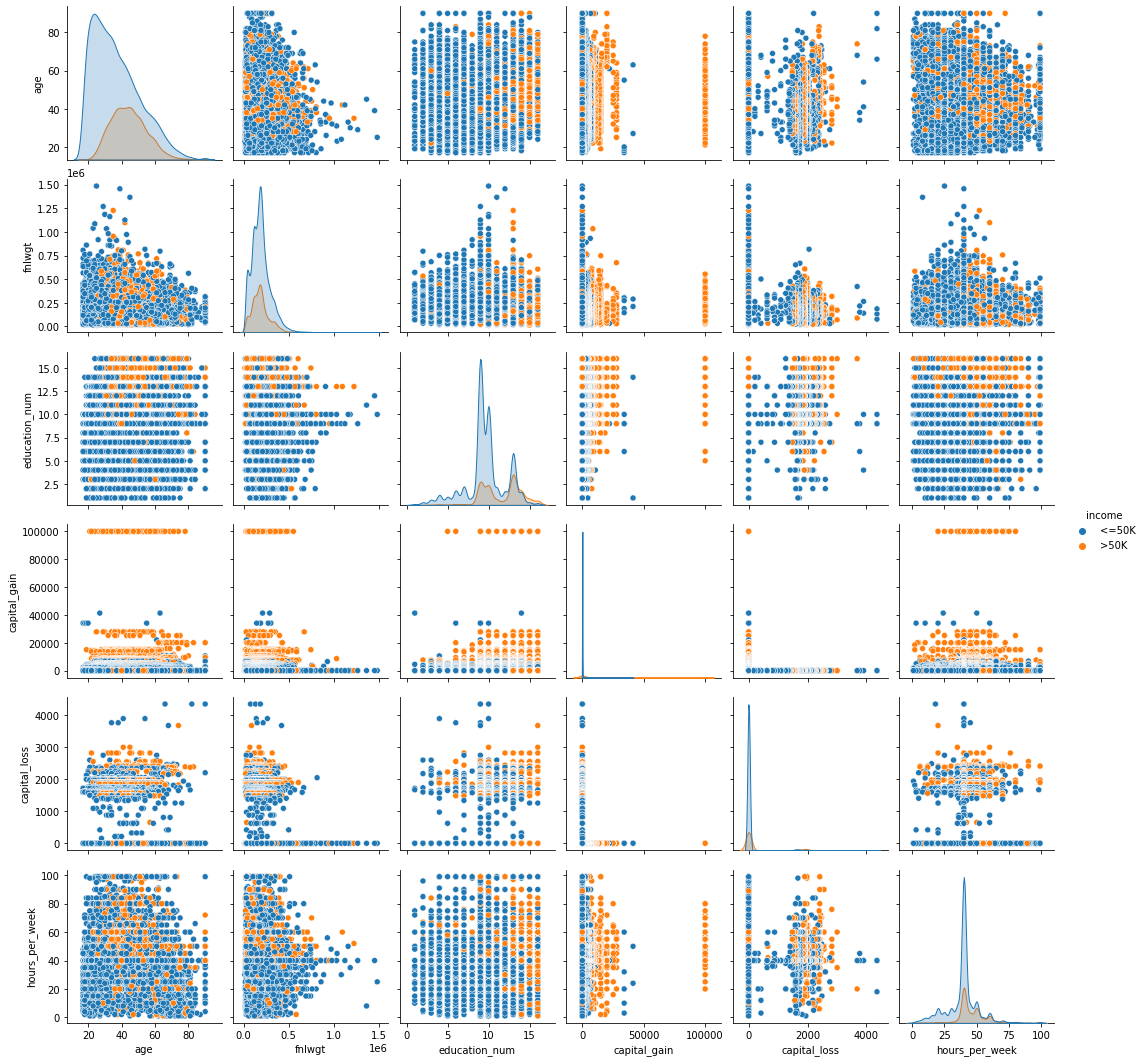

In [108]:
sns.pairplot(data,hue='income')

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
LE=LabelEncoder()

data['income']=LE.fit_transform(data['income'])

In [111]:
data

age workclass  fnlwgt  ... hours_per_week  native_country income
0       90         ?   77053  ...             40   United-States      0
1       82   Private  132870  ...             18   United-States      0
2       66         ?  186061  ...             40   United-States      0
3       54   Private  140359  ...             40   United-States      0
4       41   Private  264663  ...             40   United-States      0
...    ...       ...     ...  ...            ...             ...    ...
32556   22   Private  310152  ...             40   United-States      0
32557   27   Private  257302  ...             38   United-States      0
32558   40   Private  154374  ...             40   United-States      1
32559   58   Private  151910  ...             40   United-States      0
32560   22   Private  201490  ...             20   United-States      0

[32561 rows x 15 columns]

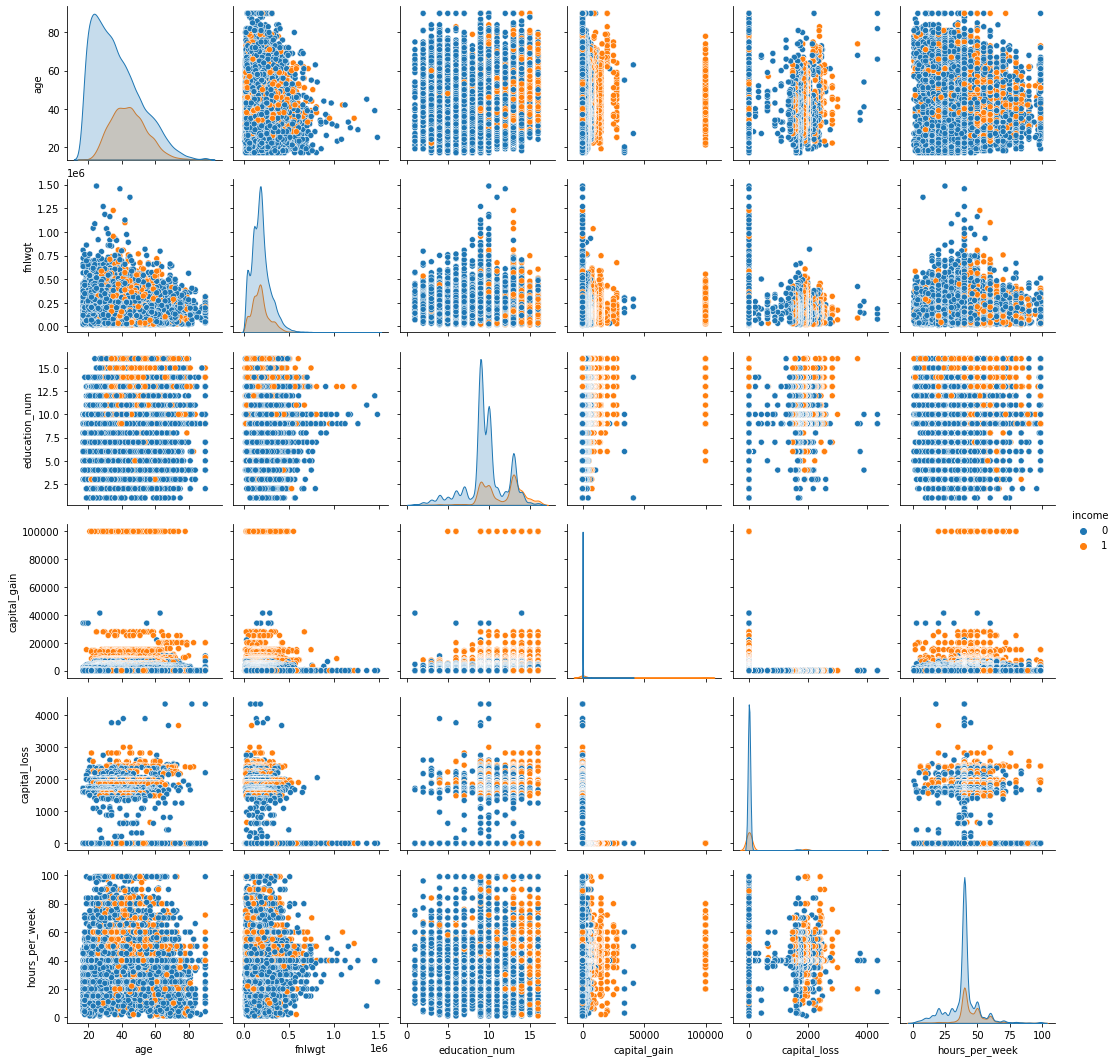

In [112]:
sns.pairplot(data,hue='income')

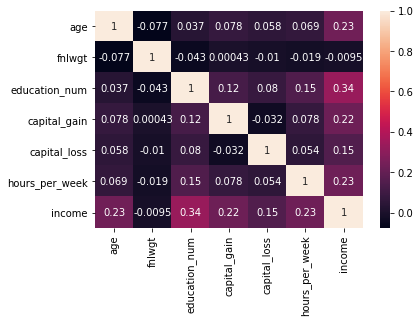

In [116]:
sns.heatmap(data.corr(),annot=True)